In [54]:
import pandas as pd
import numpy as np

In [55]:
covid = pd.read_csv('owid-covid-data.csv')
covid.head() #= covid.sample(100)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [56]:
#from ydata_profiling import ProfileReport
#profile = ProfileReport(covid, title='Covid',
                 #html={'style': {'full_width': True}})
#profile.to_file('Covid.html')


In [57]:
covid.shape

(387302, 67)

In [58]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387302 entries, 0 to 387301
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387302 non-null  object 
 1   continent                                   368758 non-null  object 
 2   location                                    387302 non-null  object 
 3   date                                        387302 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375050 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376589 non-null  float64
 9   new_deaths_smoothed                         375359 non-null  float64
 

In [59]:
from dateutil.parser import parse

In [60]:
covid['date'] = covid['date'].apply(parse)

In [61]:
(covid.isnull().sum()/covid.shape[0]).sort_values(ascending=False)

weekly_icu_admissions_per_million          0.972399
weekly_icu_admissions                      0.972399
excess_mortality_cumulative_per_million    0.965952
excess_mortality                           0.965952
excess_mortality_cumulative                0.965952
                                             ...   
new_deaths_per_million                     0.027661
population                                 0.000000
date                                       0.000000
location                                   0.000000
iso_code                                   0.000000
Length: 67, dtype: float64

In [62]:
covid.columns[covid.isnull().sum()>340000]

Index(['icu_patients', 'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million'],
      dtype='object')

In [63]:
covid.drop(['icu_patients', 'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million'], axis=1, inplace=True)

In [64]:
covid['date'].tail()

387297   2024-03-13
387298   2024-03-14
387299   2024-03-15
387300   2024-03-16
387301   2024-03-17
Name: date, dtype: datetime64[ns]

In [65]:
covid_atual = covid[covid['date']=='2024-03-17']
covid_atual.reset_index(drop=True,inplace=True)
covid_atual

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,2024-03-17,232403.0,185.0,26.429,7982.0,0.0,0.000,...,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,4.112877e+07
1,OWID_AFR,NaN,Africa,2024-03-17,13139831.0,138.0,19.714,259095.0,1.0,0.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.426737e+09
2,ALB,Europe,Albania,2024-03-17,334863.0,0.0,0.000,3605.0,0.0,0.000,...,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,2.842318e+06
3,DZA,Africa,Algeria,2024-03-17,272010.0,0.0,0.000,6881.0,0.0,0.000,...,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,4.490323e+07
4,ASM,Oceania,American Samoa,2024-03-17,8359.0,0.0,0.000,34.0,0.0,0.000,...,NaN,283.750,NaN,NaN,NaN,NaN,NaN,73.74,NaN,4.429500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,WLF,Oceania,Wallis and Futuna,2024-03-17,3550.0,0.0,0.000,8.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN,1.159600e+04
243,OWID_WRL,NaN,World,2024-03-17,774954379.0,52836.0,7548.000,7040264.0,962.0,137.429,...,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,7.975105e+09
244,YEM,Asia,Yemen,2024-03-17,11945.0,0.0,0.000,2159.0,0.0,0.000,...,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470,3.369661e+07
245,ZMB,Africa,Zambia,2024-03-17,349404.0,100.0,14.286,4069.0,0.0,0.000,...,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584,2.001767e+07


In [66]:
covid_atual.sort_values(by='total_cases',ascending=False).head(15)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
243,OWID_WRL,NaN,World,2024-03-17,774954379.0,52836.0,7548.000,7040264.0,962.0,137.429,...,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,0.737,7.975105e+09
95,OWID_HIC,NaN,High income,2024-03-17,428366918.0,19981.0,2854.429,2980286.0,855.0,122.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.250515e+09
12,OWID_ASI,NaN,Asia,2024-03-17,301381380.0,6242.0,891.714,1636814.0,15.0,2.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.721383e+09
69,OWID_EUR,NaN,Europe,2024-03-17,252376812.0,29633.0,4233.286,2099276.0,122.0,17.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.448078e+08
235,OWID_UMC,NaN,Upper middle income,2024-03-17,245529308.0,30701.0,4385.857,2666619.0,94.0,13.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.525921e+09
70,OWID_EUN,NaN,European Union,2024-03-17,185596049.0,3440.0,491.429,1260605.0,38.0,5.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.501468e+08
160,OWID_NAM,NaN,North America,2024-03-17,124525104.0,1137.0,162.429,1659943.0,763.0,109.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.003237e+08
233,USA,North America,United States,2024-03-17,103436829.0,NaN,NaN,1182424.0,758.0,108.286,...,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926,3.382899e+08
44,CHN,Asia,China,2024-03-17,99343195.0,3426.0,489.429,122046.0,0.0,0.000,...,0.7,261.899,9.74,1.900,48.400,NaN,4.340,76.91,0.761,1.425887e+09
127,OWID_LMC,NaN,Lower middle income,2024-03-17,97517992.0,1863.0,266.143,1341352.0,13.0,1.857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.432097e+09


In [67]:
covid_atual.rename(columns={'location':'country'},inplace=True)

In [68]:
total_casos = covid_atual.groupby('country').agg(total_de_casos=('total_cases', max)).reset_index()
total_casos.sort_values(by='total_de_casos',ascending=False).head(15)

,country,total_de_casos
243,World,774954379.0
95,High income,428366918.0
12,Asia,301381380.0
69,Europe,252376812.0
235,Upper middle income,245529308.0
70,European Union,185596049.0
160,North America,124525104.0
233,United States,103436829.0
44,China,99343195.0
127,Lower middle income,97517992.0


In [69]:
total_mortes = covid_atual.groupby('country').agg(total_de_mortes=('total_deaths', max)).reset_index()
total_mortes.sort_values(by='total_de_mortes',ascending=False).head(15)

,country,total_de_mortes
243,World,7040264.0
95,High income,2980286.0
235,Upper middle income,2666619.0
69,Europe,2099276.0
160,North America,1659943.0
12,Asia,1636814.0
206,South America,1352946.0
127,Lower middle income,1341352.0
70,European Union,1260605.0
233,United States,1182424.0


In [70]:
total_casos_2 = total_casos.query('country=="United States" or country=="China" or country=="India" or country=="France" or country=="Germany" or country=="Brazil"')
total_casos_2 = total_casos_2.sort_values(by='total_de_casos', ascending=False)
total_casos_2.reset_index(drop=True, inplace=True)
total_casos_2

,country,total_de_casos
0,United States,103436829.0
1,China,99343195.0
2,India,45032655.0
3,France,38997490.0
4,Germany,38437756.0
5,Brazil,37519960.0


In [71]:
covid_1 = covid.query('location=="United States" or location=="China" or location=="India" or location=="France" or location=="Germany" or location=="Brazil"')
covid_1

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
46056,BRA,South America,Brazil,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,215313504.0
46057,BRA,South America,Brazil,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,215313504.0
46058,BRA,South America,Brazil,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,215313504.0
46059,BRA,South America,Brazil,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,215313504.0
46060,BRA,South America,Brazil,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,215313504.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366124,USA,North America,United States,2024-03-24,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,338289856.0
366125,USA,North America,United States,2024-03-25,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,338289856.0
366126,USA,North America,United States,2024-03-26,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,338289856.0
366127,USA,North America,United States,2024-03-27,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,338289856.0


In [72]:
covid_1['date'] = pd.to_datetime(covid_1['date'], format='%d/%m/%Y')
covid_1['ano'] = covid_1['date'].dt.year 
covid_1['ano']

46056     2020
46057     2020
46058     2020
46059     2020
46060     2020
          ... 
366124    2024
366125    2024
366126    2024
366127    2024
366128    2024
Name: ano, Length: 9231, dtype: int32

In [73]:
import plotly.express as px

In [74]:
fig = px.histogram(total_casos_2, x='country', y='total_de_casos', color='country')
fig.update_layout(
    title="Ranking de países com mais casos de COVID-19",
    xaxis_title = "Países",
    yaxis_title = "Total de casos",
    font = {'color': 'Black', 'size':18, 'family':'Courier New'},
    title_font = {'size':30}
)
fig.show()

In [75]:
covid_line = covid.query('location=="United States" or location=="China" or location=="India" or location=="France" or location=="Germany" or location=="Brazil"')
covid_line

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
46056,BRA,South America,Brazil,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,215313504.0
46057,BRA,South America,Brazil,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,215313504.0
46058,BRA,South America,Brazil,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,215313504.0
46059,BRA,South America,Brazil,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,215313504.0
46060,BRA,South America,Brazil,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,215313504.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366124,USA,North America,United States,2024-03-24,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,338289856.0
366125,USA,North America,United States,2024-03-25,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,338289856.0
366126,USA,North America,United States,2024-03-26,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,338289856.0
366127,USA,North America,United States,2024-03-27,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,338289856.0


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [77]:
covid_line_ = covid_line.query('date <= "2021-05"')

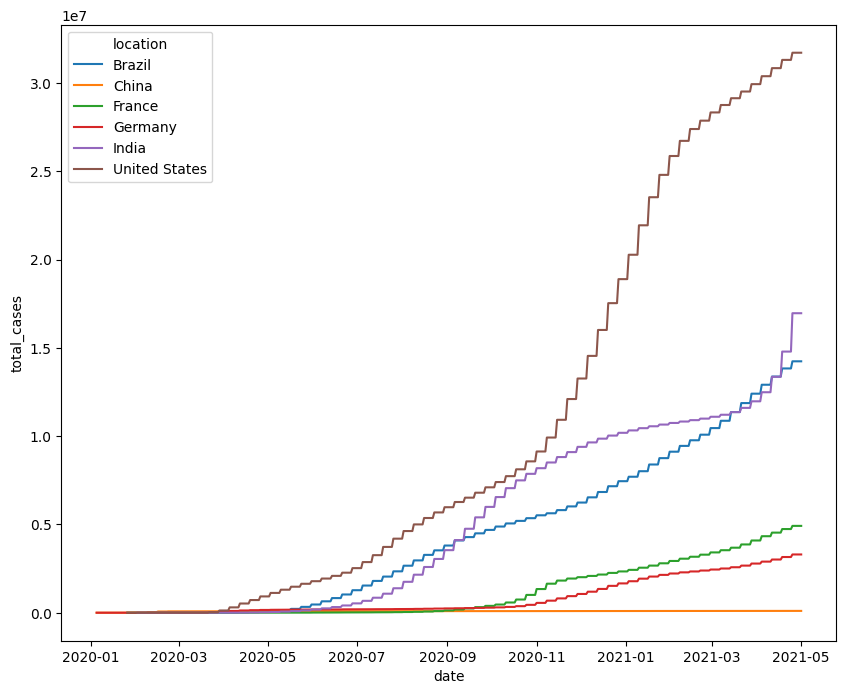

In [78]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data=covid_line_,x=covid_line_['date'], y=covid_line_['total_cases'] , hue=covid_line_['location'], palette='tab10')
plt.show()

In [79]:
print(covid[(covid['location']=='China') & (covid['date'] >= '2023-01') & (covid['date'] <= '2023-04') ]['total_cases'].max() - covid[(covid['location']=='China') & (covid['date'] >= '2023-01') & (covid['date'] <= '2023-04') ]['total_cases'].min())

12147580.0


In [80]:
print(covid[(covid['location']=='Brazil') & (covid['date'] >= '2023-01') & (covid['date'] <= '2023-04') ]['total_cases'].max() - covid[(covid['location']=='Brazil') & (covid['date'] >= '2023-01') & (covid['date'] <= '2023-04') ]['total_cases'].min())

873396.0


In [81]:
#fig, ax = plt.subplots(figsize=(20,16))
#sns.lineplot(covid_line,x='date',y='new_cases',hue='location')
#plt.show()

In [82]:
casos_mundo = total_casos[total_casos['country']=='World']
casos_mundo

,country,total_de_casos
243,World,774954379.0


In [83]:
total_casos_alt = pd.concat([total_casos_2, casos_mundo])
total_casos_alt.sort_values(by='total_de_casos', ascending=False, inplace=True)
total_casos_alt.reset_index(drop=True, inplace=True)
total_casos_alt

,country,total_de_casos
0,World,774954379.0
1,United States,103436829.0
2,China,99343195.0
3,India,45032655.0
4,France,38997490.0
5,Germany,38437756.0
6,Brazil,37519960.0


In [84]:
fig_2 = px.histogram(total_casos_alt, x='country', y='total_de_casos', color='country')
fig_2.update_layout(
    title='Comparação de países com mais casos de COVID/Mundo',
    xaxis_title = 'Países/Mundo',
    yaxis_title = 'Total de casos',
    font={'color':'black', 'size':18, 'family':'Courier New'},
    title_font={'size':30}
)
fig_2.show()

In [85]:
total_mortes_2 = total_mortes.query('country=="United States" or country=="Brazil" or country=="India" or country=="Russia" or country=="Mexico"')
total_mortes_2.sort_values(by='total_de_mortes',ascending=False, inplace=True)
total_mortes_2.reset_index(drop=True, inplace=True)
total_mortes_2
                                    

,country,total_de_mortes
0,United States,1182424.0
1,Brazil,702116.0
2,India,533521.0
3,Russia,402374.0
4,Mexico,334958.0


In [86]:
fig_3 = px.histogram(total_mortes_2, x='country', y='total_de_mortes', color='country')
fig_3.update_layout(
    title="Ranking de países com mais mortes de COVID-19",
    xaxis_title = "Países",
    yaxis_title = "Total de mortes",
    font = {'color': 'Black', 'size':18, 'family':'Courier New'},
    title_font = {'size':30}
)
fig_3.show()

In [87]:
mortes_mundo = total_mortes[total_mortes['country']=='World']
mortes_mundo

,country,total_de_mortes
243,World,7040264.0


In [88]:
mortes_mundo = pd.concat([mortes_mundo, total_mortes_2])
mortes_mundo.reset_index(drop=True, inplace=True)
mortes_mundo

,country,total_de_mortes
0,World,7040264.0
1,United States,1182424.0
2,Brazil,702116.0
3,India,533521.0
4,Russia,402374.0
5,Mexico,334958.0


In [89]:
fig_4 = px.histogram(mortes_mundo, x='country', y='total_de_mortes', color='country')
fig_4.update_layout(
    title="Comparação dos países com mais mortes com o mundo.",
    xaxis_title = "Países/Mundo",
    yaxis_title = "Total de mortes",
    font = {'color': 'Black', 'size':18, 'family':'Courier New'},
    title_font = {'size':30}
)
fig_4.show()

In [90]:
covid_america_sul = covid[covid['continent']=='South America']
covid_america_sul = pd.DataFrame(covid_america_sul)
covid_america_sul

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
13806,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.50,16.2,27.7,NaN,5.0,76.67,0.845,45510324.0
13807,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.50,16.2,27.7,NaN,5.0,76.67,0.845,45510324.0
13808,ARG,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.50,16.2,27.7,NaN,5.0,76.67,0.845,45510324.0
13809,ARG,South America,Argentina,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.50,16.2,27.7,NaN,5.0,76.67,0.845,45510324.0
13810,ARG,South America,Argentina,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,0.6,191.032,5.50,16.2,27.7,NaN,5.0,76.67,0.845,45510324.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376878,VEN,South America,Venezuela,2024-03-13,552695.0,0.0,0.0,5856.0,0.0,0.0,...,NaN,204.850,6.47,NaN,NaN,NaN,0.8,72.06,0.711,28301700.0
376879,VEN,South America,Venezuela,2024-03-14,552695.0,0.0,0.0,5856.0,0.0,0.0,...,NaN,204.850,6.47,NaN,NaN,NaN,0.8,72.06,0.711,28301700.0
376880,VEN,South America,Venezuela,2024-03-15,552695.0,0.0,0.0,5856.0,0.0,0.0,...,NaN,204.850,6.47,NaN,NaN,NaN,0.8,72.06,0.711,28301700.0
376881,VEN,South America,Venezuela,2024-03-16,552695.0,0.0,0.0,5856.0,0.0,0.0,...,NaN,204.850,6.47,NaN,NaN,NaN,0.8,72.06,0.711,28301700.0


In [91]:
fig_5 = px.histogram(covid_america_sul, x='location', y='new_cases', color='location')
fig_5.update_layout(
    title="Casos de COVID-19 em toda a na América do Sul.",
    xaxis_title = "Países",
    yaxis_title = "Total de casos",
    font = {'color': 'Black', 'size':18, 'family':'Courier New'},
    title_font = {'size':30}
)
fig_5.show()

In [92]:
fig_7 = px.histogram(covid_america_sul, x='location', y='new_deaths', color='location')
fig_7.update_layout(
    title="Mortes por COVID-19 em toda a na América do Sul.",
    xaxis_title = "Países",
    yaxis_title = "Total de mortes",
    font = {'color': 'Black', 'size':18, 'family':'Courier New'},
    title_font = {'size':30}
)
fig_7.show()

In [93]:
covid_america_sul = covid_america_sul.query('location=="Brazil" or location=="Argentina" or location=="Colombia" or location=="Chile" or location=="Peru"')
covid_america_sul

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
13806,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.50,16.2,27.7,NaN,5.0,76.67,0.845,45510324.0
13807,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.50,16.2,27.7,NaN,5.0,76.67,0.845,45510324.0
13808,ARG,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.50,16.2,27.7,NaN,5.0,76.67,0.845,45510324.0
13809,ARG,South America,Argentina,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.50,16.2,27.7,NaN,5.0,76.67,0.845,45510324.0
13810,ARG,South America,Argentina,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,0.6,191.032,5.50,16.2,27.7,NaN,5.0,76.67,0.845,45510324.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271403,PER,South America,Peru,2024-03-13,4524748.0,0.0,0.0,220831.0,0.0,0.0,...,3.5,85.755,5.95,4.8,NaN,NaN,1.6,76.74,0.777,34049588.0
271404,PER,South America,Peru,2024-03-14,4524748.0,0.0,0.0,220831.0,0.0,0.0,...,3.5,85.755,5.95,4.8,NaN,NaN,1.6,76.74,0.777,34049588.0
271405,PER,South America,Peru,2024-03-15,4524748.0,0.0,0.0,220831.0,0.0,0.0,...,3.5,85.755,5.95,4.8,NaN,NaN,1.6,76.74,0.777,34049588.0
271406,PER,South America,Peru,2024-03-16,4524748.0,0.0,0.0,220831.0,0.0,0.0,...,3.5,85.755,5.95,4.8,NaN,NaN,1.6,76.74,0.777,34049588.0


In [94]:
x = covid_america_sul.groupby(by='location').agg(casos_america=('total_cases', max))
x.sort_values('casos_america', ascending=False, inplace=True)
x.reset_index(inplace=True)
x

,location,casos_america
0,Brazil,37519960.0
1,Argentina,10095225.0
2,Colombia,6384097.0
3,Chile,5343520.0
4,Peru,4524748.0


In [95]:
fig_6 = px.histogram(x, x='location', y='casos_america', color='location')
fig_6.update_layout(
    title="Países com mais casos de COVID-19, na América do Sul.",
    xaxis_title = "Países",
    yaxis_title = "Total de casos",
    font = {'color': 'Black', 'size':18, 'family':'Courier New'},
    title_font = {'size':30}
)
fig_6.show()

In [96]:
y = covid_america_sul.groupby(by='location').agg(mortes_america=('total_deaths', max))
y.sort_values('mortes_america', ascending=False, inplace=True)
y.reset_index(inplace=True)
y

,location,mortes_america
0,Brazil,702116.0
1,Peru,220831.0
2,Colombia,142727.0
3,Argentina,130608.0
4,Chile,64482.0


In [97]:
fig_8 = px.histogram(y, x='location', y='mortes_america', color='location')
fig_8.update_layout(
    title="Países com mais mortes por COVID-19, na América do Sul.",
    xaxis_title = "Países",
    yaxis_title = "Total de mortes",
    font = {'color': 'Black', 'size':18, 'family':'Courier New'},
    title_font = {'size':30}
)
fig_8.show()